In [634]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Regresión Logística

## Titanic
Vamos a crear un modelo que prediga la probabilidad de supervivencia de los pasajeros

https://www.kaggle.com/c/titanic/data?select=train.csv

0. Importar data de training y testing. Agregarle a la tabla de testing la columna survived proveniente de la tabla gender_submission

In [639]:
train = pd.read_csv("train.csv")

In [641]:
test = pd.read_csv("test.csv")

In [643]:
gender = pd.read_csv("gender_submission.csv")

In [645]:
test=test.merge(
    gender,
    how = 'left'
)
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0


1. Buscar columnas con valores nulos y cantidad de nulos en cada una. Fijarse el porcentaje de los datos nulos que representan sobre el total.

In [648]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [650]:
total_filas = train.shape[0]
total_nulos = train.isnull().sum()
porcentaje_nulos = round((total_nulos / total_filas) * 100,2)
porcentaje_nulos

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

In [652]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Survived         0
dtype: int64

In [654]:
total_filas_test = test.shape[0]
total_nulos_test = test.isnull().sum()
porcentaje_nulos_test = round((total_nulos_test / total_filas_test) * 100,2)
porcentaje_nulos_test

PassengerId     0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            20.57
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.24
Cabin          78.23
Embarked        0.00
Survived        0.00
dtype: float64

2. En base al resultado anterior. Cuales columnas consideran que tienen sentido completar y cuales se deberían eliminar? Eliminar la que corresponda de la tabla de test y de train.

In [657]:
train.drop(columns = "Cabin", inplace = True, axis = 1)

In [659]:
test.drop(columns = "Cabin", inplace = True, axis = 1)

3. Completar valores nulos con el criterio que considres correcto en cada una de las columnas (que tengan sentido completar). Esto debe hacerse tanto en la tabla de training como la de testing (con el mismo criterio en ambas).

   Verificar como se distribuyen los valores de cada columna con un gráfico previamente para tener más herramientas en la decisión

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Count'>

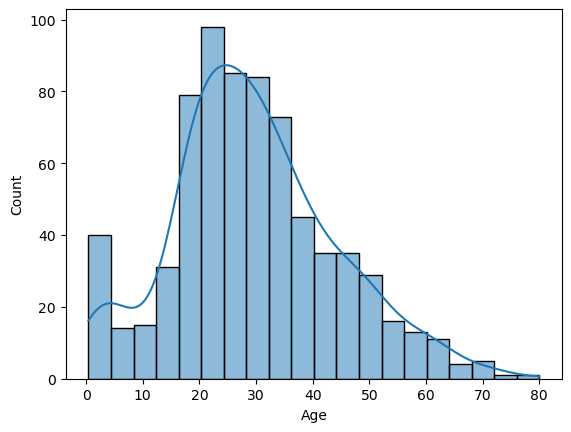

In [662]:
sns.histplot(train["Age"], kde = True)

In [664]:
train["Age"].median()

28.0

In [666]:
test["Age"].median()

27.0

In [668]:
train.Age.fillna(round(train.Age.median(),0), inplace=True)

In [670]:
test.Age.fillna(round(train.Age.median(),0), inplace=True)

<Axes: xlabel='Embarked', ylabel='count'>

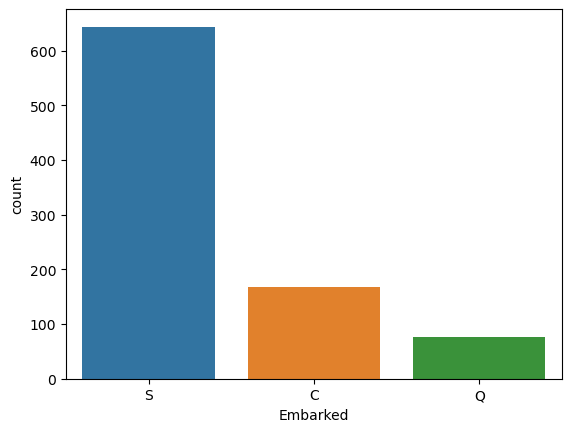

In [672]:
sns.countplot(x=train.Embarked)

In [674]:
train.Embarked.ffill(inplace = True)

In [676]:
test.Embarked.ffill(inplace = True)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Fare', ylabel='Count'>

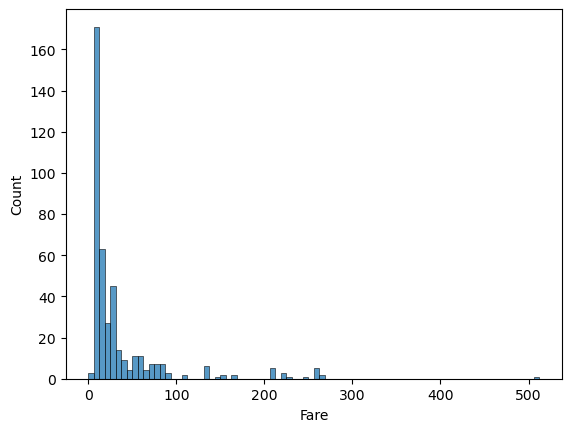

In [678]:
sns.histplot(x = test.Fare)

In [680]:
test.loc[test.Fare.isnull(),:]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,S,0


In [682]:
promedio_tercera_clase = test.loc[test.Pclass == 3, "Fare"].mean()

In [684]:
test.Fare.fillna(promedio_tercera_clase, inplace = True)

4. Realizar análisis exploratorio. Graficar las personas que sobrevivieron por:
    - Clase (Pclass)
    - Sexo (Sex)
    - Costo de boleto (Fare)

In [687]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

AttributeError: 'numpy.int64' object has no attribute 'startswith'

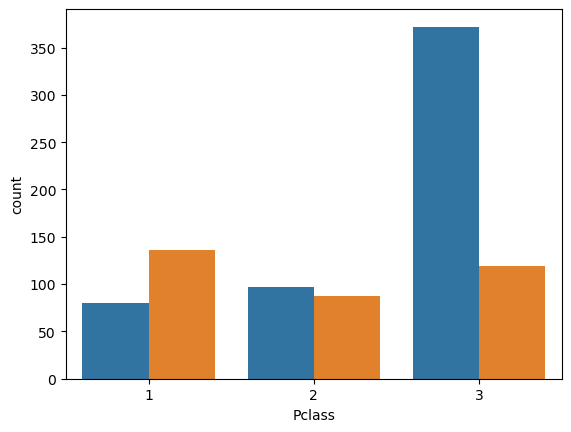

In [689]:
sns.countplot(x='Pclass', hue='Survived', data=train)
plt.title('Sobrevivientes por Clase')
plt.xlabel('Clase')
plt.ylabel('Cantidad')
plt.show()


AttributeError: 'numpy.int64' object has no attribute 'startswith'

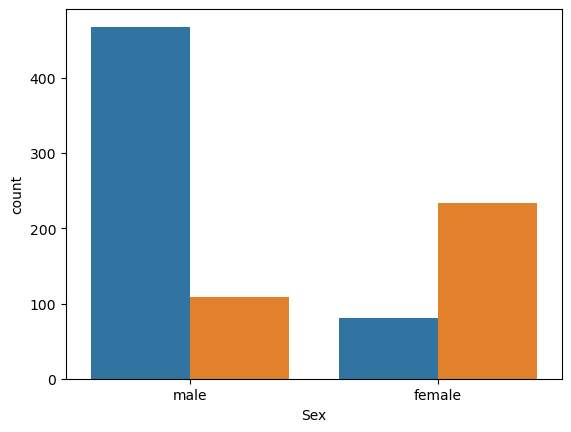

In [691]:
sns.countplot(x='Sex', hue='Survived', data=train)
plt.title('Sobrevivientes por Clase')
plt.xlabel('Clase')
plt.ylabel('Cantidad')
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


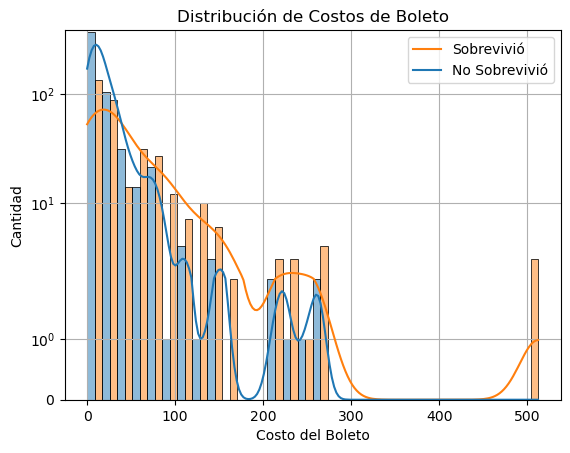

In [693]:
sns.histplot(data=train, x='Fare', hue='Survived', bins=30, kde=True, multiple ="dodge")
plt.title('Distribución de Costos de Boleto')
plt.xlabel('Costo del Boleto')
plt.ylabel('Cantidad')
plt.yscale('symlog')
plt.grid(True)
plt.legend(['Sobrevivió', 'No Sobrevivió'])
plt.show()

5. Verificar columnas del DataFrame e identificar sobre cuales se deberían generar variables dummies.
   Generar columnas de dummies sobre "Pclass","Embarked" y "Sex". Aplicar cambios en training y testing

In [696]:
for i in train.columns:
    print(f"{i}: {type(train[i][0])}")

PassengerId: <class 'numpy.int64'>
Survived: <class 'numpy.int64'>
Pclass: <class 'numpy.int64'>
Name: <class 'str'>
Sex: <class 'str'>
Age: <class 'numpy.float64'>
SibSp: <class 'numpy.int64'>
Parch: <class 'numpy.int64'>
Ticket: <class 'str'>
Fare: <class 'numpy.float64'>
Embarked: <class 'str'>


In [698]:
train = pd.get_dummies(
    train,
    columns = ["Pclass", "Embarked", "Sex"],
    drop_first = True
)

In [700]:
test = pd.get_dummies(
    test,
    columns = ["Pclass", "Embarked", "Sex"],
    drop_first = True
)

In [702]:
train.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Sex_male
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,False,True,False,True,True
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,False,False,False,False,False
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,False,True,False,True,False
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,False,False,False,True,False
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,False,True,False,True,True


6. Eliminar columnas del dataset que considere que no suman al modelo. Hacerlo en testing y training

In [705]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [707]:
train.drop(columns = "Name", inplace = True, axis = 1)

In [709]:
test.drop(columns = "Name", inplace = True, axis = 1)

In [711]:
train.drop(columns = "Ticket", inplace = True, axis = 1)

In [713]:
test.drop(columns = "Ticket", inplace = True, axis = 1)

In [715]:
train.drop(columns = "PassengerId", inplace = True, axis = 1)

In [717]:
test.drop(columns = "PassengerId", inplace = True, axis = 1)

7. Agregar una columna llamada "IsMinor" que sea 1 en caso de tener 16 años o menos y 0 en caso contrario. Hacerlo para testing y training

In [720]:
train.loc[:,'IsMinor'] = train['Age'].apply(lambda x: 1 if x <= 16 else 0)

In [722]:
test.loc[:,'IsMinor'] = X_test['Age'].apply(lambda x: 1 if x <= 16 else 0)

In [724]:
train.head()

,Survived,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Sex_male,IsMinor
0,0,22.0,1,0,7.2500,False,True,False,True,True,0
1,1,38.0,1,0,71.2833,False,False,False,False,False,0
2,1,26.0,0,0,7.9250,False,True,False,True,False,0
3,1,35.0,1,0,53.1000,False,False,False,True,False,0
4,0,35.0,0,0,8.0500,False,True,False,True,True,0


8. Ajustar modelo considerando todas las variables del dataset de training.

In [727]:
X_train = train.loc[:,train.columns != 'Survived']
y_train = train.loc[:,'Survived']

modelo = LogisticRegression(max_iter = 10000000)

In [586]:
modelo.fit(X_train,y_train)

LogisticRegression(max_iter=10000000)

9. Validar el modelo con datos de testing, agregar dos columnas a test_data:
    * predicción: valor 0 o 1
    * probabilidad_prediccion: valor de la probabilidad devuelta por el modelo

In [588]:
X_test = test.loc[:,test.columns != 'Survived']
y_test = test.loc[:,'Survived']

In [596]:
y_pred = modelo.predict(X_test)
y_pred_prob = modelo.predict_proba(X_test)[:,1]

In [739]:
y_pred_prob

array([0.11723165, 0.38295307, 0.18506946, 0.0961793 , 0.49078586,
       0.27576102, 0.6676996 , 0.18030358, 0.72759212, 0.05690262,
       0.0939374 , 0.31619755, 0.90130361, 0.09782263, 0.8285818 ,
       0.84610491, 0.2993873 , 0.15439387, 0.49676914, 0.58924115,
       0.30532413, 0.26292133, 0.90716833, 0.54876018, 0.90796172,
       0.04187635, 0.94207438, 0.14993898, 0.3456211 , 0.07100569,
       0.12759762, 0.15637279, 0.39805348, 0.42872156, 0.43706909,
       0.16206065, 0.58614122, 0.62518602, 0.10055699, 0.11167773,
       0.09563148, 0.41223727, 0.07136239, 0.81516079, 0.83025853,
       0.09999339, 0.41917405, 0.13359009, 0.89351949, 0.47060768,
       0.37438535, 0.34401904, 0.69645229, 0.84990496, 0.33932772,
       0.11032885, 0.0810896 , 0.09989528, 0.06802535, 0.96825616,
       0.11782004, 0.23612083, 0.1153891 , 0.70731   , 0.77330028,
       0.82659337, 0.72612585, 0.32535353, 0.4978831 , 0.81021729,
       0.69770862, 0.10858026, 0.58042496, 0.51146002, 0.96227

10. Calcular matriz de confusión

In [600]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

matriz_confusion = confusion_matrix(y_test,y_pred)

In [607]:
matriz_confusion

array([[253,  13],
       [ 16, 136]], dtype=int64)

11. Calcular Accuracy

In [610]:
TN = matriz_confusion[0][0]
TP = matriz_confusion[1][1]
FN = matriz_confusion[1][0]
FP = matriz_confusion[0][1]

In [613]:
(TN + TP) / (TN+TP+FN+FP)

0.930622009569378

12. Calcular sensibilidad

In [616]:
TP / (TP+FN)

0.8947368421052632

13. Calcular especificidad

In [625]:
TN / (TN+FP)

0.9511278195488722

14. Graficar curva de ROC

In [621]:
especificidad_inv, sensibilidad, threshold = roc_curve(y_test, y_pred_prob)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

<Axes: >

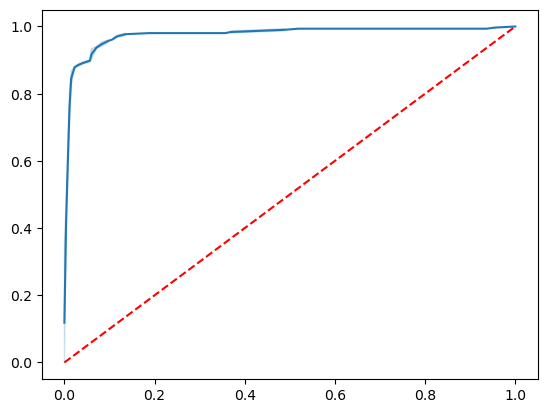

In [628]:
recta_x = [i*0.01 for i in range(101)]
recta_y = recta_x
sns.lineplot(x = especificidad_inv, y = sensibilidad)
sns.lineplot(x=recta_x, y = recta_y,ls="--", color = "red")

15. Calcular valor de área bajo la curva de ROC

In [631]:
roc_auc_score(y_test, y_pred_prob)

0.9762316976652158